In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [8]:
vehicle_df = pd.read_csv('vehicle.csv')

In [9]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [10]:
#checking for null values
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
vehicle_df.shape

(846, 19)

In [12]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


D:\AnacondaDestinationFolder\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\AnacondaDestinationFolder\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


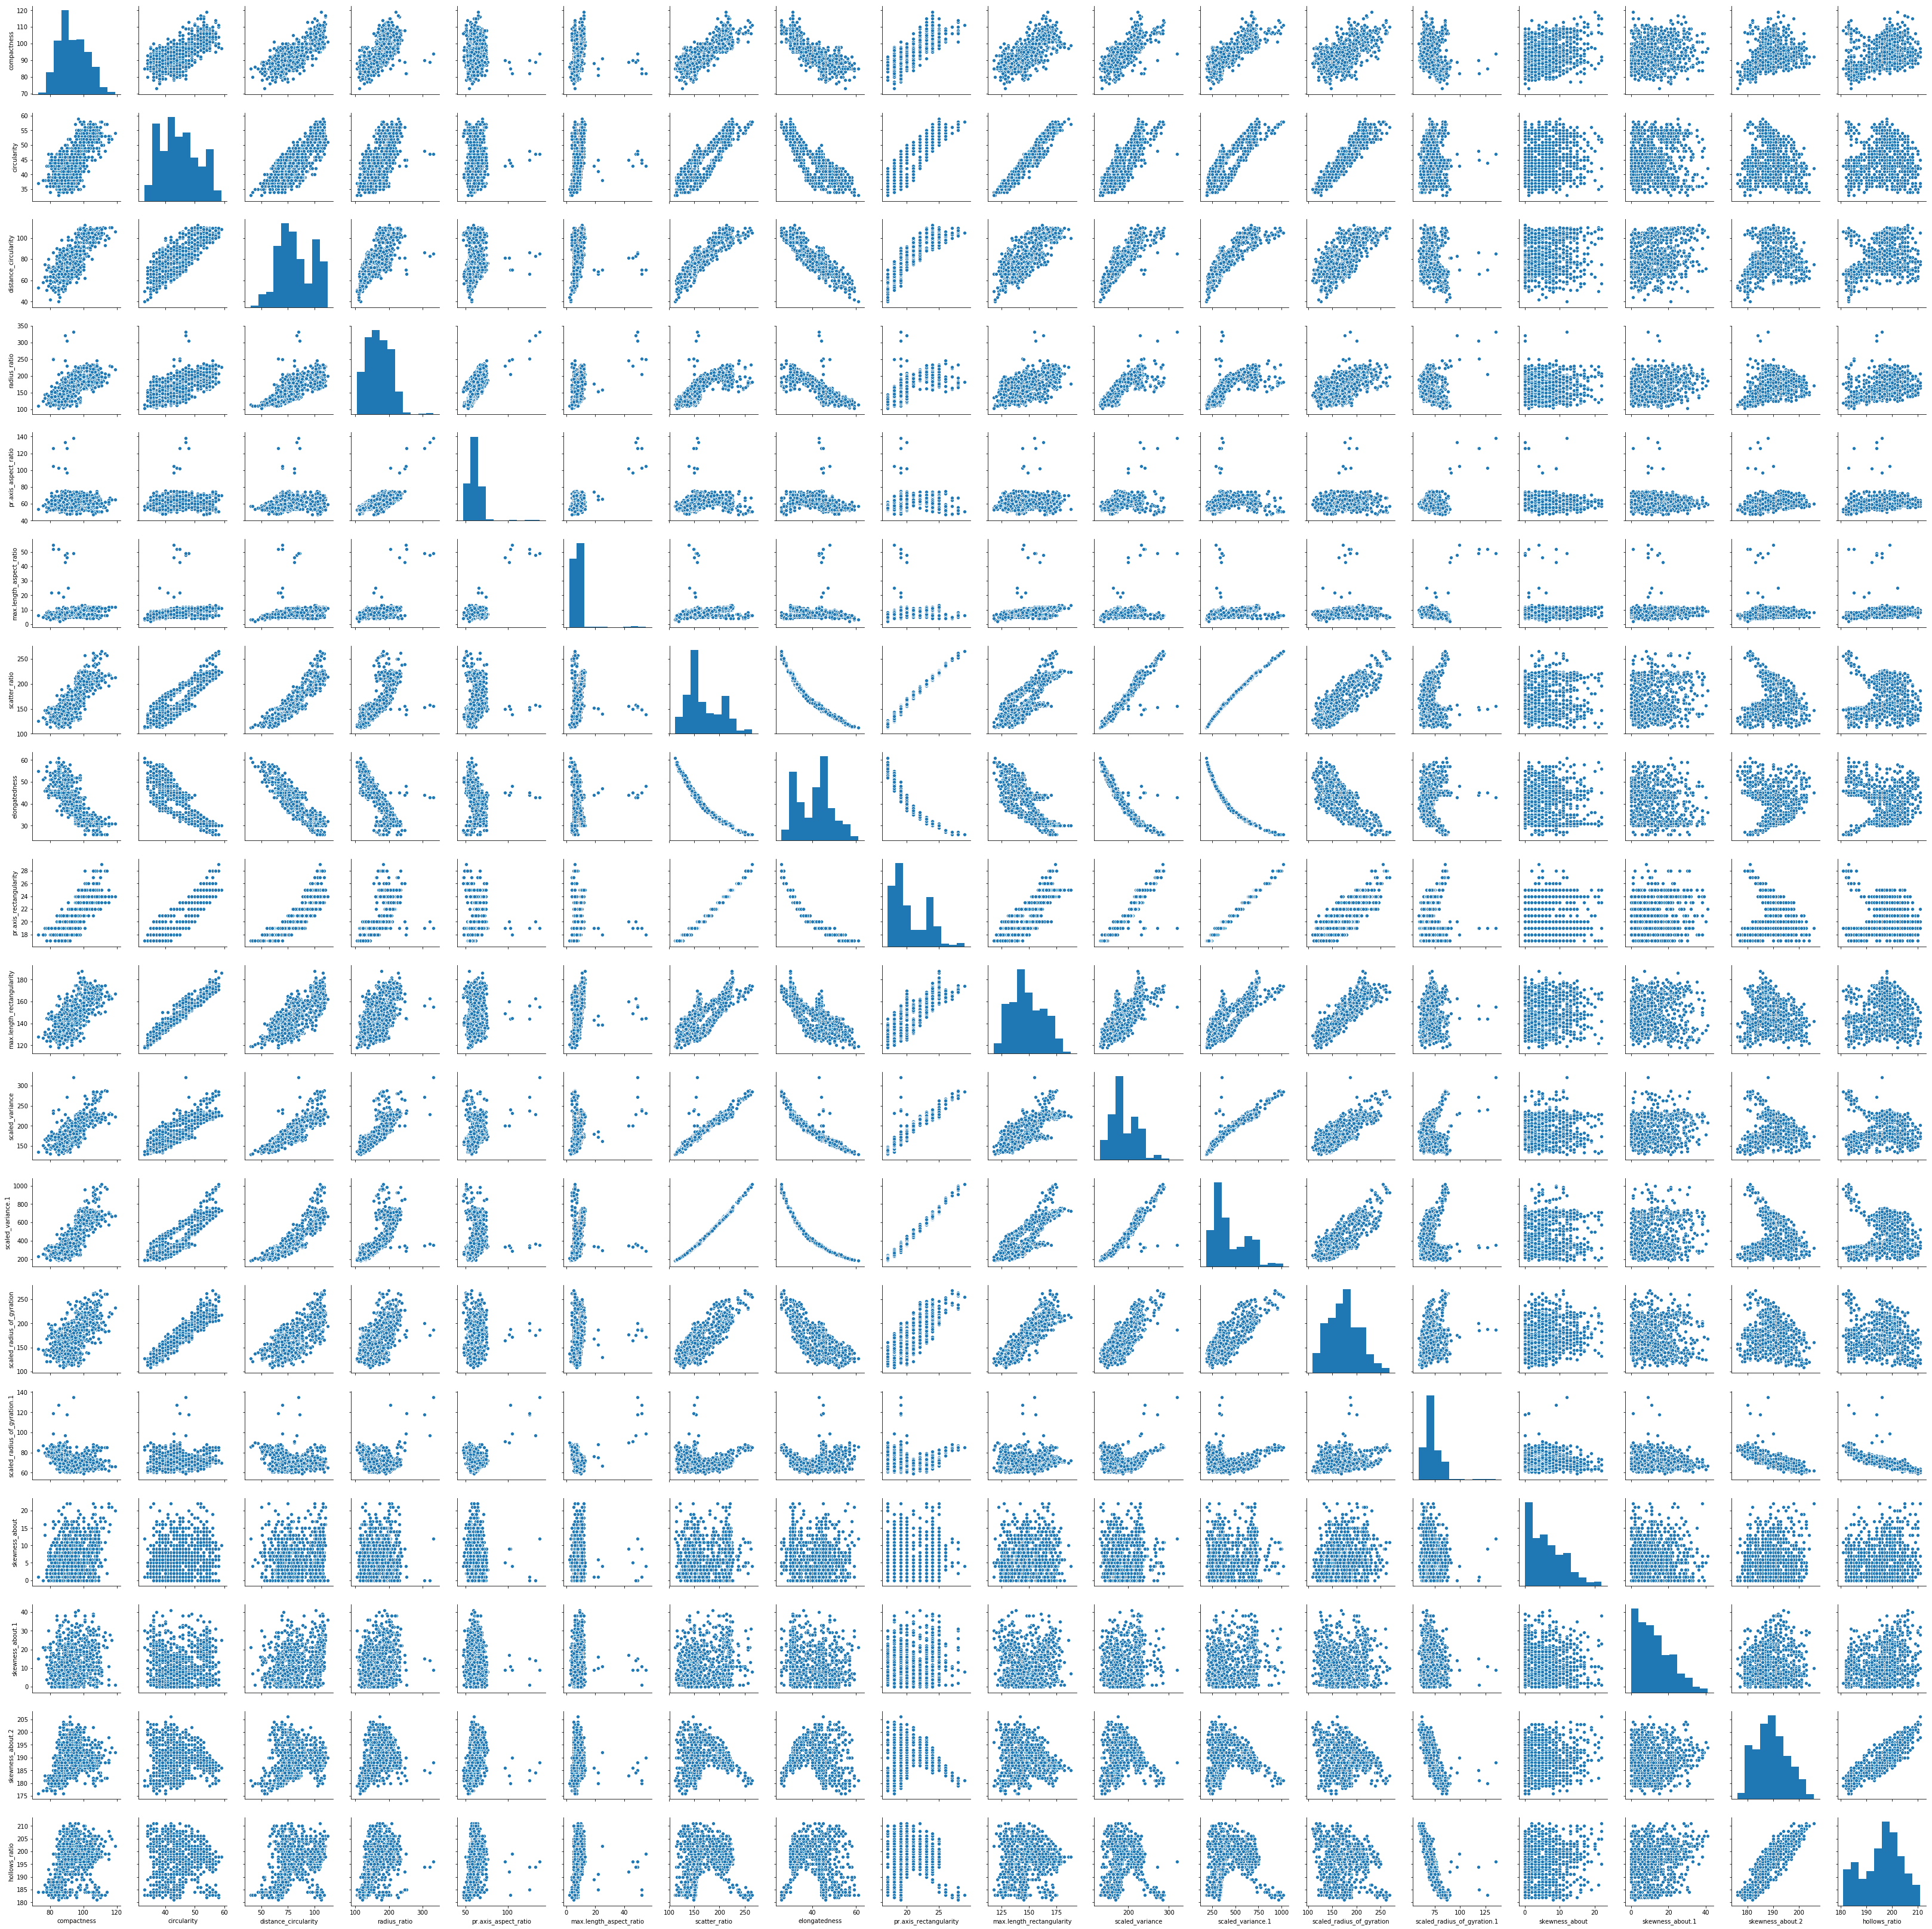

In [13]:
sns.pairplot(vehicle_df)

In [14]:
#Checking compactness column
vehicle_df.compactness.unique()

array([ 95,  91, 104,  93,  85, 107,  97,  90,  86,  88,  89,  94,  96,
        99, 101,  84,  87,  83, 102,  80, 100,  82, 106,  81, 119,  78,
        92,  98, 103,  77,  73,  79, 110, 108, 109, 111, 105, 112, 116,
       113, 117, 115,  76, 114], dtype=int64)

In [15]:
#checking circularity column
vehicle_df.circularity.unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [16]:
median1 = vehicle_df['circularity'].median()
vehicle_df['circularity'].fillna(median1, inplace=True)

In [17]:
vehicle_df.circularity.unique()

array([48., 41., 50., 44., 43., 34., 36., 46., 42., 49., 55., 54., 56.,
       47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58., 57.,
       33.])

In [18]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [19]:
#Checking distance_circularity
median2 = vehicle_df['distance_circularity'].median()
vehicle_df['distance_circularity'].fillna(median2, inplace=True)

In [20]:
#checking radius_ratio
median3 = vehicle_df['radius_ratio'].median()
vehicle_df['radius_ratio'].fillna(median3, inplace=True)

In [21]:
# Checking pr.axis_aspect_ratio
median4 = vehicle_df['pr.axis_aspect_ratio'].median()
vehicle_df['pr.axis_aspect_ratio'].fillna(median4, inplace=True)

In [22]:
#Checking scatter_ratio
median5 = vehicle_df['scatter_ratio'].median()
vehicle_df['scatter_ratio'].fillna(median5, inplace=True)

In [23]:
#Checking elongatedness
median6 = vehicle_df['elongatedness'].median()
vehicle_df['elongatedness'].fillna(median6, inplace=True)

In [24]:
#checking pr.axis_rectangularity
median7 = vehicle_df['pr.axis_rectangularity'].median()
vehicle_df['pr.axis_rectangularity'].fillna(median7, inplace=True)

In [25]:
#Checking scaled_variance
median8 = vehicle_df['scaled_variance'].median()
vehicle_df['scaled_variance'].fillna(median8, inplace=True)

In [26]:
#Checking scaled_variance.1
median9 = vehicle_df['scaled_variance.1'].median()
vehicle_df['scaled_variance.1'].fillna(median9, inplace=True)

In [27]:
#Checking scaled_radius_of_gyration
median10 = vehicle_df['scaled_radius_of_gyration'].median()
vehicle_df['scaled_radius_of_gyration'].fillna(median10, inplace=True)

In [28]:
#Checking scaled_radius_of_gyration
median11 = vehicle_df['scaled_radius_of_gyration.1'].median()
vehicle_df['scaled_radius_of_gyration.1'].fillna(median11, inplace=True)

In [29]:
#Checking skewness_about
median12 = vehicle_df['skewness_about'].median()
vehicle_df['skewness_about'].fillna(median12, inplace=True)

In [30]:
#Checking skewness_about.1
median13 = vehicle_df['skewness_about.1'].median()
vehicle_df['skewness_about.1'].fillna(median13, inplace=True)

In [31]:
#Checking skewness_about.2
median14 = vehicle_df['skewness_about.2'].median()
vehicle_df['skewness_about.2'].fillna(median14, inplace=True)

In [32]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


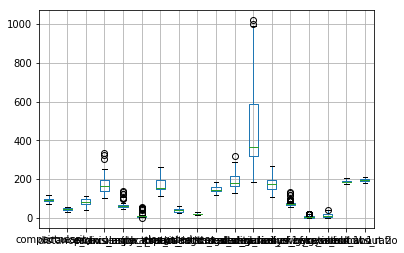

In [33]:
vehicle_df.boxplot()

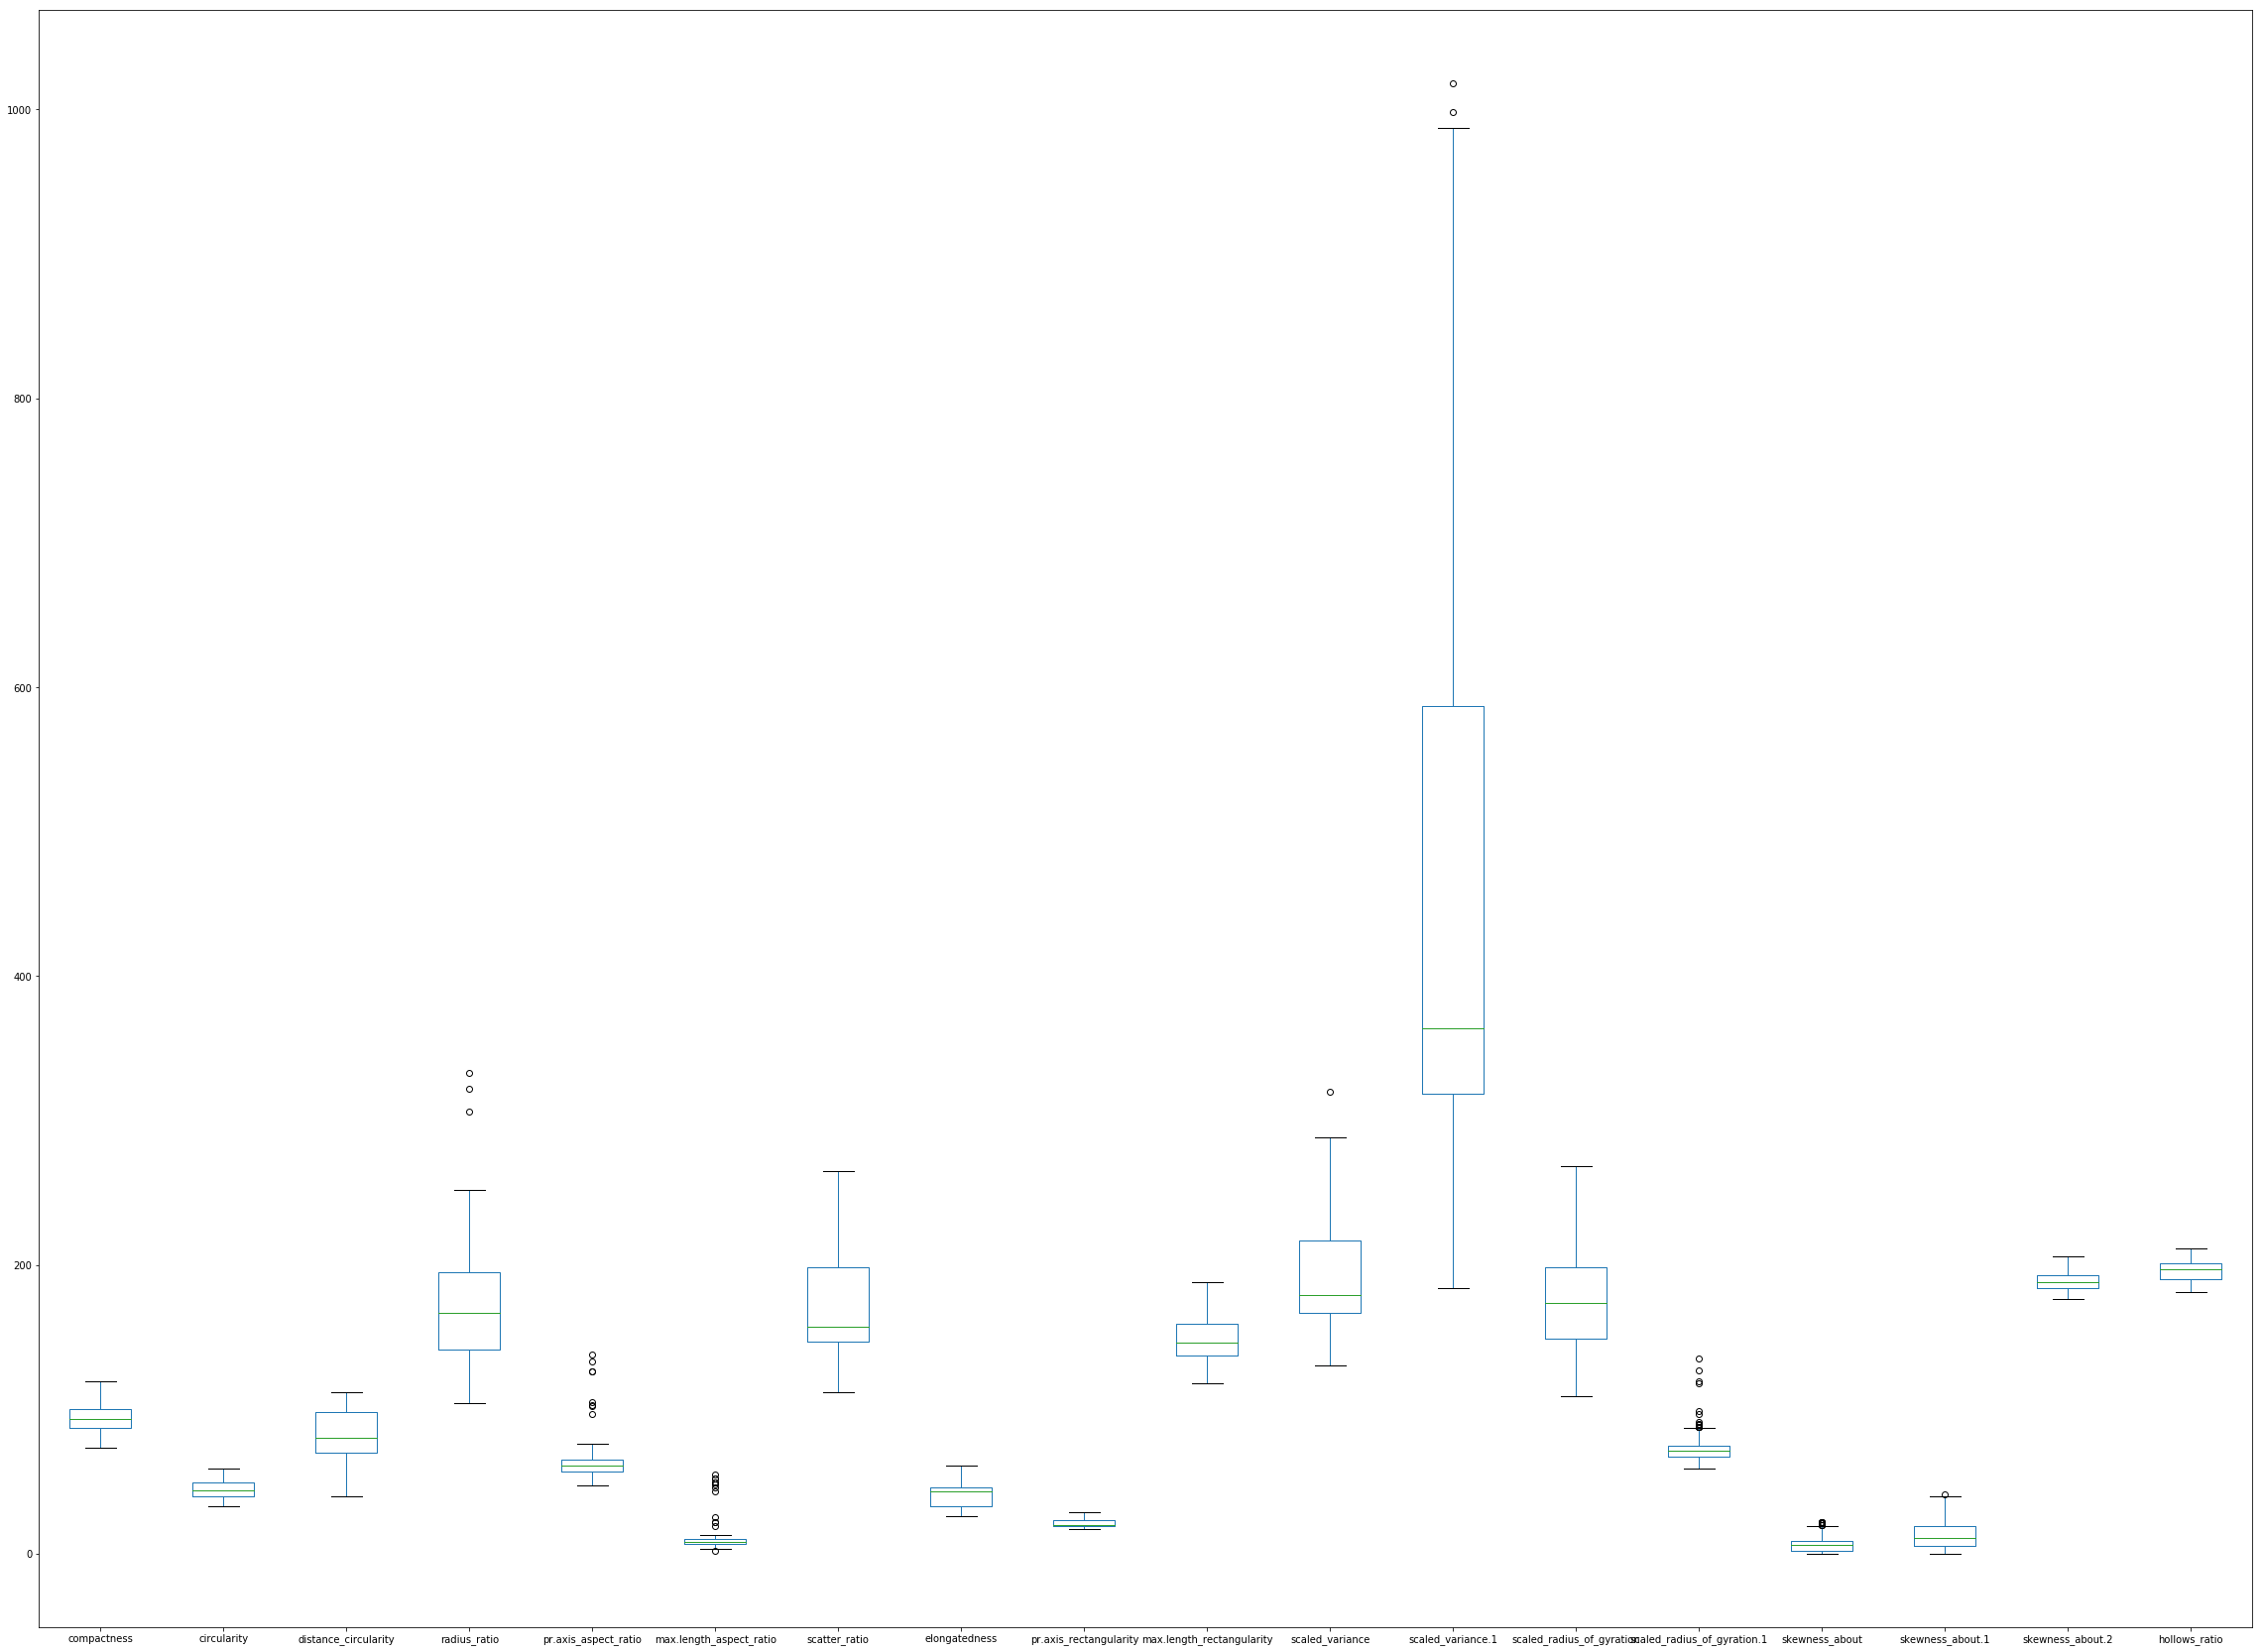

In [34]:
vehicle_df.plot(kind='box', figsize=(40,30))

In [35]:
print('from the above Box plot we can see that there are outliers in the data in a columns like->')
print('radius_ratio')
print('pr.axis_aspect_ratio')
print('max.length_aspect_ratio')
print('scaled_variance')
print('scaled_variance.1')
print('scaled_radius_of_gyration.1')
print('skewness_about')
print('skewness_about.1 ')

from the above Box plot we can see that there are outliers in the data in a columns like->
radius_ratio
pr.axis_aspect_ratio
max.length_aspect_ratio
scaled_variance
scaled_variance.1
scaled_radius_of_gyration.1
skewness_about
skewness_about.1 


In [36]:
print('printing boxplot for column having outlier individually')

printing boxplot for column having outlier individually


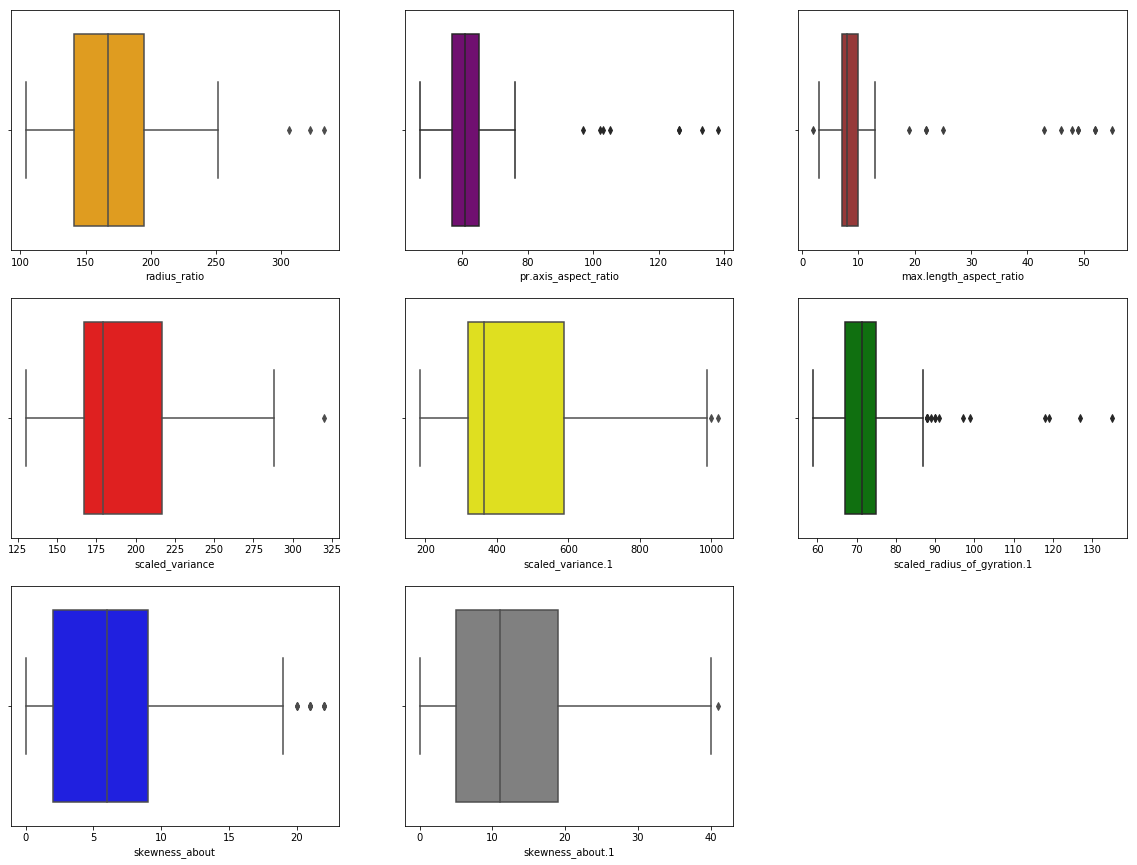

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x=vehicle_df['radius_ratio'],color='orange')

plt.subplot(3,3,2)
sns.boxplot(x=vehicle_df['pr.axis_aspect_ratio'],color='purple')

plt.subplot(3,3,3)
sns.boxplot(x=vehicle_df['max.length_aspect_ratio'],color='brown')

plt.subplot(3,3,4)
sns.boxplot(x=vehicle_df['scaled_variance'],color='red')

plt.subplot(3,3,5)
sns.boxplot(x=vehicle_df['scaled_variance.1'],color='yellow')

plt.subplot(3,3,6)
sns.boxplot(x=vehicle_df['scaled_radius_of_gyration.1'],color='green')

plt.subplot(3,3,7)
sns.boxplot(x=vehicle_df['skewness_about'],color='blue')

plt.subplot(3,3,8)
sns.boxplot(x=vehicle_df['skewness_about.1'],color='grey')

In [38]:
Q1 = vehicle_df.quantile(0.25)
Q3 = vehicle_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [39]:
vehicle_df.drop('class',axis=1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204


In [40]:
new_vehicle_df = vehicle_df[~((vehicle_df < (Q1-1.5*IQR)) | (vehicle_df > (Q3+1.5*IQR))).any(axis=1)]

In [41]:
new_vehicle_df.shape

(813, 19)

In [42]:
print('checking if any outlier is still present')

checking if any outlier is still present


As we can see, there are no outlier present now


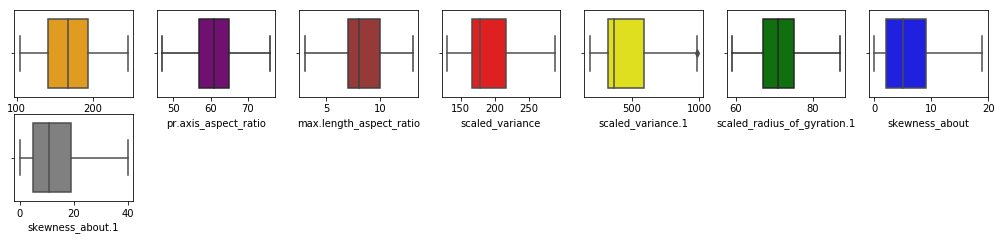

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(8,8,1)
sns.boxplot(x=new_vehicle_df['radius_ratio'],color='orange')

plt.subplot(8,8,2)
sns.boxplot(x=new_vehicle_df['pr.axis_aspect_ratio'],color='purple')

plt.subplot(8,8,3)
sns.boxplot(x=new_vehicle_df['max.length_aspect_ratio'],color='brown')

plt.subplot(8,8,4)
sns.boxplot(x=new_vehicle_df['scaled_variance'],color='red')

plt.subplot(8,8,5)
sns.boxplot(x=new_vehicle_df['scaled_variance.1'],color='yellow')

plt.subplot(8,8,6)
sns.boxplot(x=new_vehicle_df['scaled_radius_of_gyration.1'],color='green')

plt.subplot(8,8,7)
sns.boxplot(x=new_vehicle_df['skewness_about'],color='blue')

plt.subplot(8,8,9)
sns.boxplot(x=new_vehicle_df['skewness_about.1'],color='grey')

print('As we can see, there are no outlier present now')

In [44]:
new_vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [69]:
clean_vehicle_df = new_vehicle_df.drop('class', axis=1)
y = new_vehicle_df['class']

In [46]:
print('since PCA only done on independent attribute so dropped class variable')

since PCA only done on independent attribute so dropped class variable


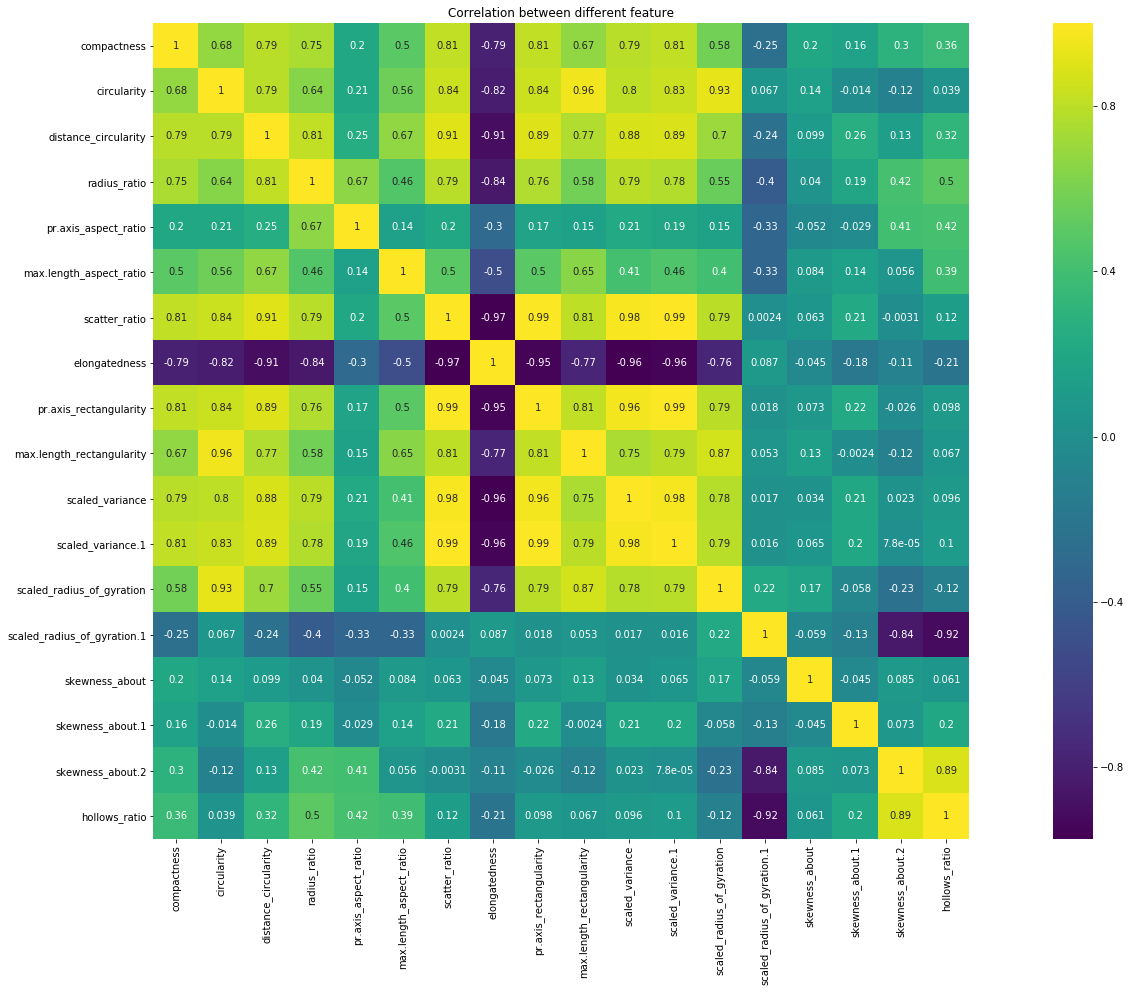

In [47]:
correlation = clean_vehicle_df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation, vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different feature')
plt.show()

In [48]:
print('1. circularity with pr.axis_rectangularity and max.length_rectangularity is having very strong correlation of 0.84 and 0.96 respectivily')
print('2. circularity is also correlated scaled_radius_of_gyration')
print('3. distance circularity is highly correlated with scatter_ration')
print('4. scatter_ratio also very highly correlated with pr.axis_rectangularity, scatter_variance and scatter_variance.1')
print('5  scaled_variance and scaled_variance.1 is negatively correlated with elongatedness')

1. circularity with pr.axis_rectangularity and max.length_rectangularity is having very strong correlation of 0.84 and 0.96 respectivily
2. circularity is also correlated scaled_radius_of_gyration
3. distance circularity is highly correlated with scatter_ration
4. scatter_ratio also very highly correlated with pr.axis_rectangularity, scatter_variance and scatter_variance.1
5  scaled_variance and scaled_variance.1 is negatively correlated with elongatedness


In [49]:
print('From above correlation matrix we can see that there are many features which are highly correlated. If we carefully analyze, we will find that many features are there which having more than 0.9 correlation. So we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:')

From above correlation matrix we can see that there are many features which are highly correlated. If we carefully analyze, we will find that many features are there which having more than 0.9 correlation. So we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:


In [50]:
new_vehicle_df.shape

(813, 19)

In [51]:
#applying PCA
X = new_vehicle_df.iloc[:,0:18].values
y = new_vehicle_df.iloc[:,18].values

In [52]:
X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [53]:
y

array(['van', 'van', 'car', 'van', 'bus', 'bus', 'van', 'van', 'car',
       'van', 'car', 'bus', 'van', 'bus', 'car', 'van', 'bus', 'car',
       'car', 'bus', 'van', 'bus', 'bus', 'car', 'van', 'car', 'car',
       'bus', 'car', 'van', 'car', 'car', 'car', 'car', 'van', 'bus',
       'car', 'bus', 'car', 'van', 'van', 'car', 'van', 'van', 'van',
       'car', 'car', 'car', 'car', 'bus', 'bus', 'van', 'car', 'van',
       'car', 'van', 'car', 'car', 'van', 'bus', 'bus', 'car', 'bus',
       'car', 'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'car',
       'car', 'car', 'bus', 'bus', 'bus', 'van', 'car', 'bus', 'van',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'bus', 'car',
       'car', 'bus', 'car', 'bus', 'van', 'van', 'van', 'bus', 'car',
       'car', 'car', 'bus', 'bus', 'van', 'van', 'car', 'van', 'van',
       'car', 'car', 'bus', 'bus', 'car', 'van', 'van', 'van', 'van',
       'bus', 'van', 'bus', 'car', 'car', 'van', 'car', 'van', 'van',
       'car', 'van',

In [54]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)


In [55]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123

In [56]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -

In [57]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

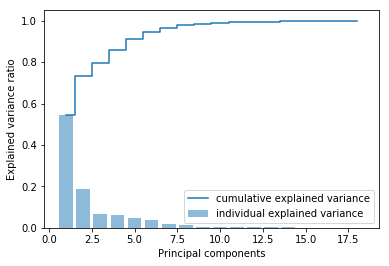

In [58]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [59]:
print('from above plot we can see that 95% of variance is explained by 8 components')

from above plot we can see that 95% of variance is explained by 8 components


In [ ]:
X_reduced = PCA(n_components=8).fit_transform(X)
X_reduced

In [80]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=1)
#Fit linear kernel
# lets take C=0.01
svc = svm.SVC(kernel='linear' ,C=0.01)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.01 and linear kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=0.05
svc = svm.SVC(kernel='linear' ,C=0.05)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.05 and linear kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=0.5
svc = svm.SVC(kernel='linear' ,C=0.5)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.5 and linear kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=1
svc = svm.SVC(kernel='linear' ,C=1)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=1 and linear kernel is:',svc.score(X_reduced_test,y_test))
print('=================')
#Fit rbf kernel
# lets take C=0.01
svc = svm.SVC(kernel='rbf' ,C=0.01)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.01 and rbf kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=0.05
svc = svm.SVC(kernel='rbf' ,C=0.05)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.05 and rbf kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=0.5
svc = svm.SVC(kernel='rbf' ,C=0.5)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=0.5 and rbf kernel is:',svc.score(X_reduced_test,y_test))
# lets take C=1
svc = svm.SVC(kernel='rbf' ,C=1)
svc.fit(X_reduced_train,y_train)
print('Accuracy for c=1 and rbf kernel is:',svc.score(X_reduced_test,y_test))

Accuracy for c=0.01 and linear kernel is: 0.8360655737704918
Accuracy for c=0.05 and linear kernel is: 0.8483606557377049
Accuracy for c=0.5 and linear kernel is: 0.8524590163934426
Accuracy for c=1 and linear kernel is: 0.8524590163934426
Accuracy for c=0.01 and rbf kernel is: 0.4959016393442623
Accuracy for c=0.05 and rbf kernel is: 0.4959016393442623


D:\AnacondaDestinationFolder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\AnacondaDestinationFolder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\AnacondaDestinationFolder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\AnacondaDestinationFolder\lib\site-packages\sklearn\svm\base.py:

Accuracy for c=0.5 and rbf kernel is: 0.4959016393442623
Accuracy for c=1 and rbf kernel is: 0.5


In [81]:
print('from the above stats, we can be sure that for c=0.5 or 1 and for linear kernel accuracy is as high as: 0.85245')

from the above stats, we can be sure that for c=0.5 or 1 and for linear kernel accuracy is as high as: 0.85245


In [85]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_reduced, y) 
# print best parameter after tuning 
print(grid.best_params_) 
print('Best Score: ', grid.best_score_)  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

D:\AnacondaDestinationFolder\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5110294117647058, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5129151291512916, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5111111111111111, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.8529411764705882, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.8339483394833949, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV]  C=0.01, gamma=1, kernel=linear, score=0.8333333333333334, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5110294117647058, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5129151291512916, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf .

[CV]  C=0.05, gamma=0.0001, kernel=linear, score=0.8529411764705882, total=   0.2s
[CV] C=0.05, gamma=0.0001, kernel=linear .............................
[CV]  C=0.05, gamma=0.0001, kernel=linear, score=0.8302583025830258, total=   0.1s
[CV] C=0.05, gamma=0.0001, kernel=linear .............................
[CV]  C=0.05, gamma=0.0001, kernel=linear, score=0.8296296296296296, total=   0.4s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.5110294117647058, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.5129151291512916, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV]  C=0.5, gamma=1, kernel=rbf, score=0.5111111111111111, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV]  C=0.5, gamma=1, kernel=linear, score=0.8602941176470589, total=   1.4s
[CV] C=0.5, gamma=1, kerne

[CV]  C=1, gamma=0.001, kernel=linear, score=0.8296296296296296, total=  10.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.8345588235294118, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.8708487084870848, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.8444444444444444, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8602941176470589, total=   2.8s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8339483394833949, total=   5.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.8296296296296296, total=   9.9s
{'C': 1, 'gamma': 0.001,

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.5min finished


In [86]:
print('from GRIDSearchCV we found the best hyperparameter as mentioned above and the accuracy came out to be:',grid.best_score_)

from GRIDSearchCV we found the best hyperparameter as mentioned above and the accuracy came out to be: 0.8806888068880688
